http://preview.d2l.ai/d2l-en/PR-1117/chapter_appendix-mathematics-for-deep-learning/distributions.html

In [1]:
%matplotlib inline
from d2l import torch as d2l
from IPython import display
from math import erf, factorial
import torch

torch.pi = torch.acos(torch.zeros(1)) * 2  # Define pi in torch

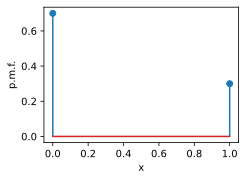

In [2]:
p = 0.3

d2l.set_figsize()
d2l.plt.stem([0, 1], [1 - p, p], use_line_collection=True)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

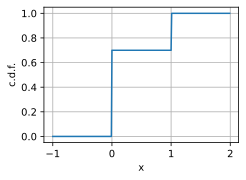

In [3]:
x = torch.arange(-1, 2, 0.01)

def F(x):
    return 0 if x < 0 else 1 if x > 1 else 1 - p

d2l.plot(x, torch.tensor([F(y) for y in x]), 'x', 'c.d.f.')

In [4]:
1*(torch.rand(10, 10) < p)

tensor([[0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1]])

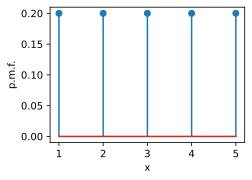

In [5]:
n = 5

d2l.plt.stem([i+1 for i in range(n)], n*[1 / n], use_line_collection=True)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

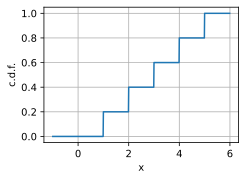

In [6]:
x = torch.arange(-1, 6, 0.01)

def F(x):
    return 0 if x < 1 else 1 if x > n else torch.floor(x) / n

d2l.plot(x, torch.tensor([F(y) for y in x]), 'x', 'c.d.f.')

In [7]:
torch.randint(1, n, size=(10, 10))

tensor([[4, 2, 4, 2, 1, 2, 3, 4, 3, 4],
        [2, 4, 4, 2, 1, 4, 4, 3, 3, 1],
        [1, 4, 3, 3, 1, 2, 3, 3, 4, 3],
        [2, 2, 1, 2, 4, 4, 2, 4, 3, 3],
        [2, 2, 1, 3, 4, 4, 4, 4, 1, 4],
        [1, 3, 4, 1, 3, 1, 2, 4, 4, 2],
        [4, 4, 2, 4, 4, 4, 4, 2, 3, 4],
        [1, 4, 1, 2, 3, 1, 1, 2, 4, 4],
        [1, 4, 1, 4, 3, 2, 1, 3, 1, 3],
        [4, 4, 4, 2, 1, 3, 1, 1, 2, 4]])

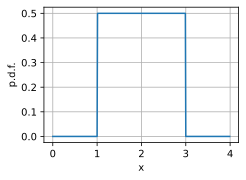

In [8]:
a, b = 1, 3

x = torch.arange(0, 4, 0.01)
p = (x > a).type(torch.float32)*(x < b).type(torch.float32)/(b-a)
d2l.plot(x, p, 'x', 'p.d.f.')

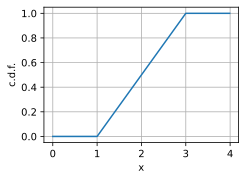

In [9]:
def F(x):
    return 0 if x < a else 1 if x > b else (x - a) / (b - a)

d2l.plot(x, torch.tensor([F(y) for y in x]), 'x', 'c.d.f.')

In [10]:
(b - a) * torch.rand(10, 10) + a

tensor([[2.2896, 2.8577, 1.7333, 1.2354, 2.2789, 1.3986, 1.5490, 1.2734, 1.5792,
         1.0629],
        [2.4681, 1.6284, 2.3286, 1.3187, 1.1630, 1.0401, 2.6159, 2.5171, 2.8904,
         1.4338],
        [2.2054, 1.2137, 1.5147, 1.7419, 1.7612, 2.4539, 1.9355, 1.1834, 1.7312,
         1.7996],
        [2.9204, 2.1381, 2.8395, 1.4445, 2.3759, 2.6735, 1.0735, 1.5691, 1.7350,
         1.5220],
        [1.5445, 2.8796, 2.3299, 1.5010, 2.3930, 2.9942, 1.1655, 2.2340, 1.8666,
         1.3228],
        [2.7684, 1.7008, 2.6075, 1.4101, 1.4400, 1.7719, 1.7343, 2.4159, 2.0098,
         2.9572],
        [1.2581, 1.9594, 1.7055, 1.8373, 2.5836, 1.4298, 1.6090, 2.6969, 2.6625,
         2.9351],
        [2.0161, 2.2952, 2.4232, 2.0179, 1.7911, 2.2719, 1.8538, 1.7677, 1.8329,
         2.4331],
        [2.4792, 1.0815, 2.2332, 2.2310, 2.2926, 2.0293, 2.6887, 2.5617, 1.9680,
         2.6216],
        [1.6445, 2.2534, 2.5598, 2.7569, 1.1182, 1.4384, 1.9030, 2.9094, 2.6211,
         2.1339]])

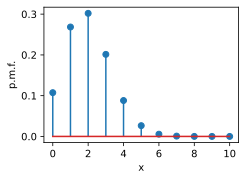

In [11]:
n, p = 10, 0.2

# Compute binomial coefficient
def binom(n, k):
    comb = 1
    for i in range(min(k, n - k)):
        comb = comb * (n - i) // (i + 1)
    return comb

pmf = torch.tensor([p**i * (1-p)**(n - i) * binom(n, i) for i in range(n + 1)])

d2l.plt.stem([i for i in range(n + 1)], pmf, use_line_collection=True)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

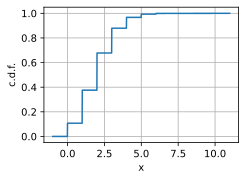

In [12]:
x = torch.arange(-1, 11, 0.01)
cmf = torch.cumsum(pmf, dim=0)

def F(x):
    return 0 if x < 0 else 1 if x > n else cmf[int(x)]

d2l.plot(x, torch.tensor([F(y) for y in x.tolist()]), 'x', 'c.d.f.')

In [13]:
m = torch.distributions.binomial.Binomial(n, p)
m.sample(sample_shape=(10, 10))

tensor([[1., 3., 2., 1., 0., 0., 4., 6., 2., 3.],
        [0., 5., 0., 1., 2., 1., 1., 2., 3., 1.],
        [0., 2., 1., 1., 0., 2., 3., 1., 1., 3.],
        [2., 1., 1., 2., 4., 5., 3., 2., 3., 3.],
        [2., 2., 2., 1., 3., 2., 2., 2., 2., 3.],
        [2., 4., 3., 2., 2., 3., 1., 2., 1., 2.],
        [4., 3., 2., 2., 3., 2., 1., 1., 4., 1.],
        [1., 2., 2., 0., 1., 2., 2., 3., 1., 3.],
        [0., 5., 2., 1., 1., 3., 1., 1., 2., 3.],
        [0., 1., 3., 5., 5., 2., 2., 2., 3., 1.]])

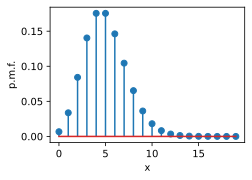

In [14]:
lam = 5.0

xs = [i for i in range(20)]
pmf = torch.tensor([torch.exp(torch.tensor(-lam)) * lam**k
                    / factorial(k) for k in xs])

d2l.plt.stem(xs, pmf, use_line_collection=True)
d2l.plt.xlabel('x')
d2l.plt.ylabel('p.m.f.')
d2l.plt.show()

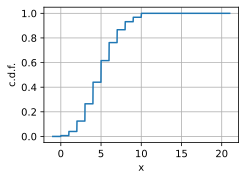

In [15]:
x = torch.arange(-1, 21, 0.01)
cmf = torch.cumsum(pmf, dim=0)
def F(x):
    return 0 if x < 0 else 1 if x > n else cmf[int(x)]

d2l.plot(x, torch.tensor([F(y) for y in x.tolist()]), 'x', 'c.d.f.')

In [16]:
m = torch.distributions.poisson.Poisson(lam)
m.sample((10, 10))

tensor([[ 5.,  5.,  2., 10.,  5.,  1.,  3.,  6.,  1.,  5.],
        [ 5.,  4.,  3.,  5.,  5.,  5.,  5.,  1.,  7.,  6.],
        [ 3.,  3.,  6.,  6.,  8.,  4.,  7.,  3.,  4., 12.],
        [ 3., 11.,  6.,  6.,  4.,  8.,  5.,  5.,  8.,  1.],
        [ 6.,  7.,  4.,  2.,  6.,  7.,  4.,  7.,  6.,  8.],
        [ 3.,  2.,  2.,  3.,  4.,  6.,  3.,  8.,  5.,  6.],
        [ 4., 10.,  4.,  2.,  2.,  3.,  4., 10.,  3.,  4.],
        [ 6.,  5.,  6.,  7.,  5.,  6.,  6.,  5.,  4.,  5.],
        [ 3.,  4.,  1.,  7.,  6.,  4.,  4.,  3.,  3.,  8.],
        [ 4.,  4.,  5.,  2.,  3.,  6., 11.,  4.,  4.,  7.]])

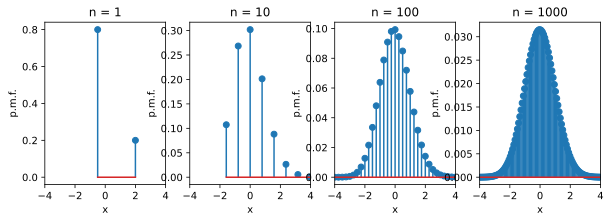

In [17]:
p = 0.2
ns = [1, 10, 100, 1000]
d2l.plt.figure(figsize=(10, 3))
for i in range(4):
    n = ns[i]
    pmf = torch.tensor([p**i * (1-p)**(n-i) * binom(n, i)
                        for i in range(n + 1)])
    d2l.plt.subplot(1, 4, i + 1)
    d2l.plt.stem([(i - n*p)/torch.sqrt(torch.tensor(n*p*(1 - p)))
                  for i in range(n + 1)], pmf,
                 use_line_collection=True)
    d2l.plt.xlim([-4, 4])
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('p.m.f.')
    d2l.plt.title("n = {}".format(n))
d2l.plt.show()

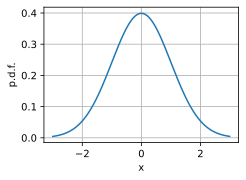

In [18]:
mu, sigma = 0, 1

x = torch.arange(-3, 3, 0.01)
p = 1 / torch.sqrt(2 * torch.pi * sigma**2) * torch.exp(
    -(x - mu)**2 / (2 * sigma**2))

d2l.plot(x, p, 'x', 'p.d.f.')

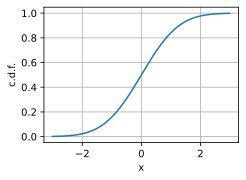

In [19]:
def phi(x):
    return (1.0 + erf((x - mu) / (sigma * torch.sqrt(torch.tensor(2.))))) / 2.0

d2l.plot(x, torch.tensor([phi(y) for y in x.tolist()]), 'x', 'c.d.f.')

In [20]:
torch.normal(mu, sigma, size=(10, 10))

tensor([[-1.2642e+00, -1.7379e-02,  2.4921e-01,  3.8082e-01, -6.3805e-01,
         -4.3327e-02, -6.3314e-01,  1.6198e+00, -4.0498e-01,  1.0645e+00],
        [-1.6600e+00, -2.1838e+00, -1.0930e-01, -1.3375e+00, -3.7995e-01,
          3.3067e-01,  1.2075e+00, -1.1770e-01,  1.5239e+00, -2.1839e-01],
        [-8.1611e-01, -7.9217e-01, -9.8088e-02, -5.9460e-01, -1.6473e+00,
          5.1164e-01, -9.9074e-01, -4.0534e-01,  1.1576e+00,  1.4982e-02],
        [-2.1253e+00,  1.0267e+00, -6.6969e-01, -1.7822e-01,  5.5987e-01,
          3.6164e-01,  4.6093e-01, -2.8337e-01, -1.3726e+00, -1.1743e+00],
        [-8.0915e-01,  7.8936e-01, -1.0087e+00, -7.8540e-01,  6.1115e-01,
         -4.8237e-01,  5.5705e-01,  1.2965e+00,  1.1259e+00,  6.6486e-01],
        [-7.0569e-01, -1.6662e-01,  4.1658e-01,  3.1670e-01,  7.0808e-01,
         -1.2893e+00,  7.1070e-02, -6.2414e-02, -6.9692e-01,  1.1990e-01],
        [ 1.5937e-01,  2.0517e-01, -1.1570e+00, -6.9408e-03, -1.8495e-01,
         -9.9419e-01,  8.7108e-0